# Predicting fetal health using machine learning


This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting fetal health based on some medical attributes.

We're going to take the following approach:

* Problem definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation


## 1. Problem Definition
in one statement
> With given clinical attributes, can we predict fetal health?

## 2. Data
The oroginal data came from Kaggle: <br>
https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

## 3. Evaluation

> If we can reach 90% accuracy at predicting maternal risk during the proof of concept, we'll pursue the project.

## 4. Features
**Create data dictionary**
1. Baseline value: Fetal heart rate (bpm/s)
2. Accelerations: Transient increases in the FHR.
3. Fetal Movement: Muscular movements of the developing baby inside the mother's womb.
4. Uterus Contractions: Muscular movements of the womb.
5. Light Decelerations: Temporary but distinct decreases of the fetal heart rate (FHR).
6. Severe Decelerations: Visually apparent, gradual decrease in the fetal heart rate typically following the uterine contraction.
7. Prolonged Decelerations:  A visually apparent decrease in the fetal heart rate below baseline by 15 bpm for longer than 2 min but less than 10 min.
8. Abnormal Short Term Variability: STV is an average of the absolute values of the differences between adjacent RR intervals in the electrocardiogram.

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## Load Data

In [2]:
df = pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [5]:
len(df)

2126

In [6]:
df.shape

(2126, 22)

## Data Exploration (exploratory data analysis or EDA)


In [7]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

<Axes: >

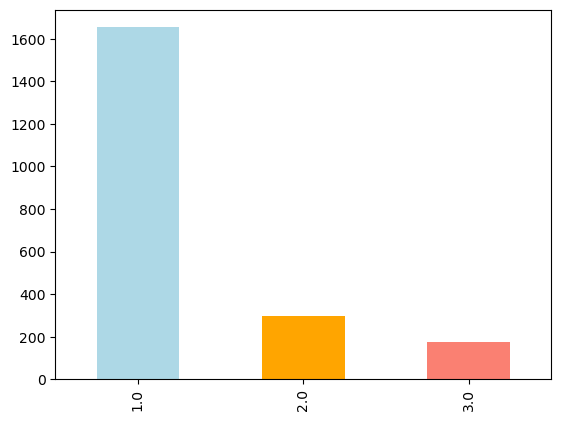

In [8]:
df['fetal_health'].value_counts().plot(kind='bar', color=['lightblue', 'orange', 'salmon'])

In [9]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [10]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [12]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### Distrubiotion

baseline value:


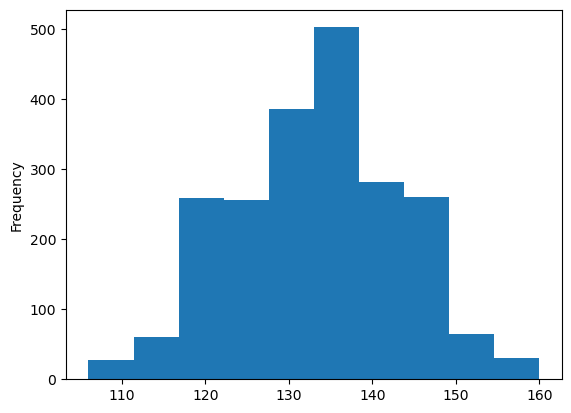

accelerations:


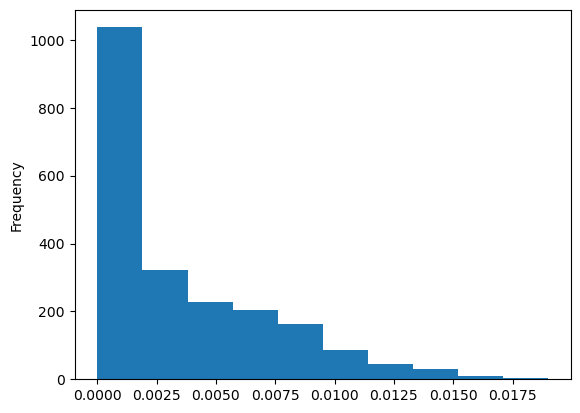

fetal_movement:


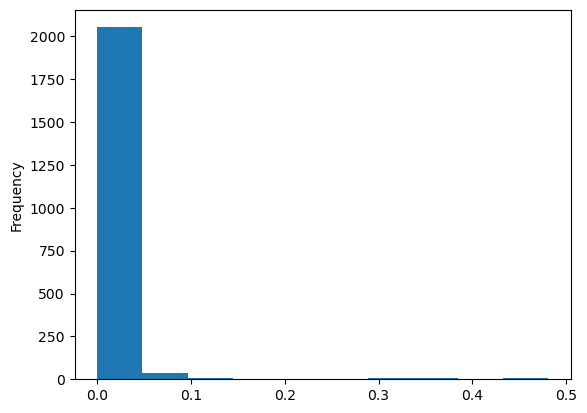

uterine_contractions:


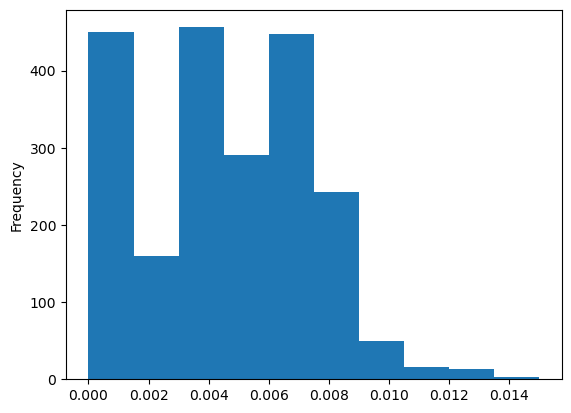

light_decelerations:


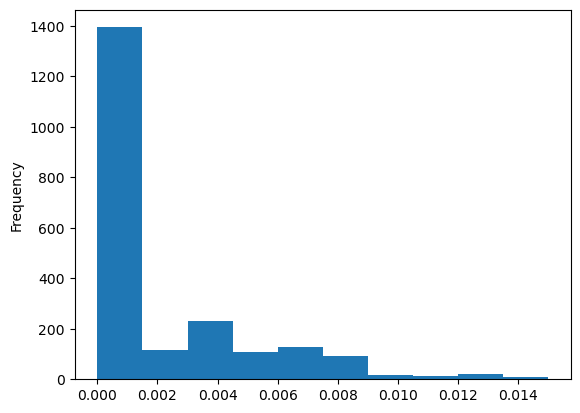

severe_decelerations:


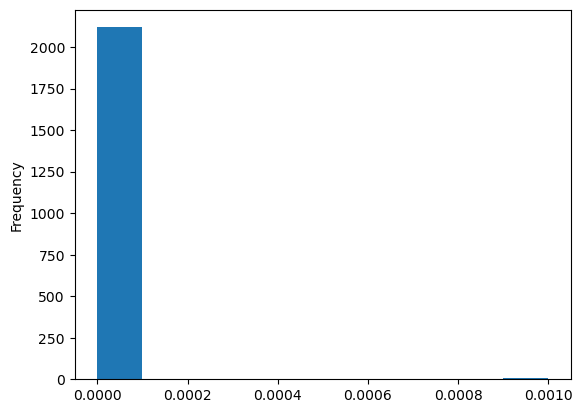

prolongued_decelerations:


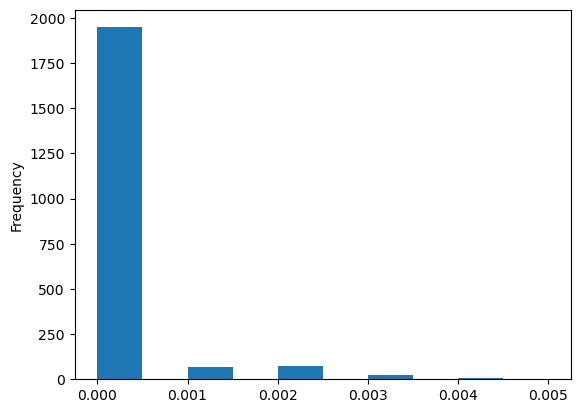

abnormal_short_term_variability:


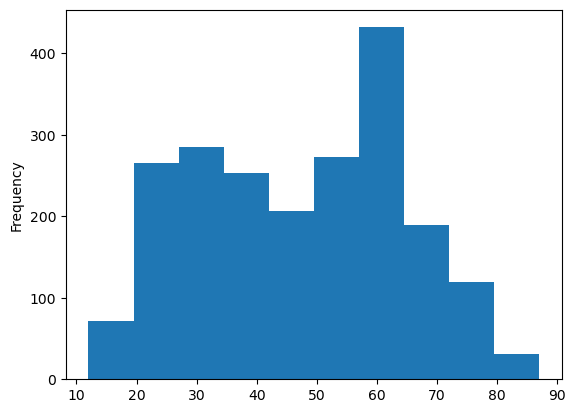

mean_value_of_short_term_variability:


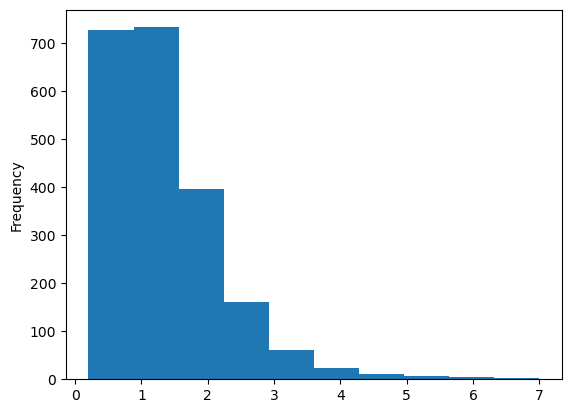

percentage_of_time_with_abnormal_long_term_variability:


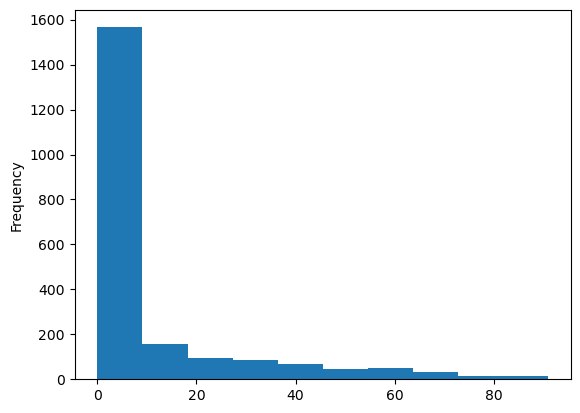

mean_value_of_long_term_variability:


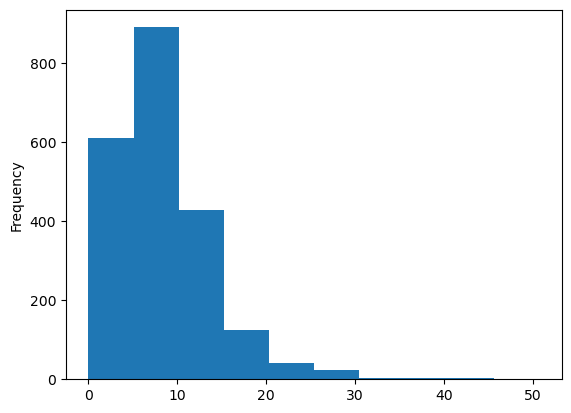

histogram_width:


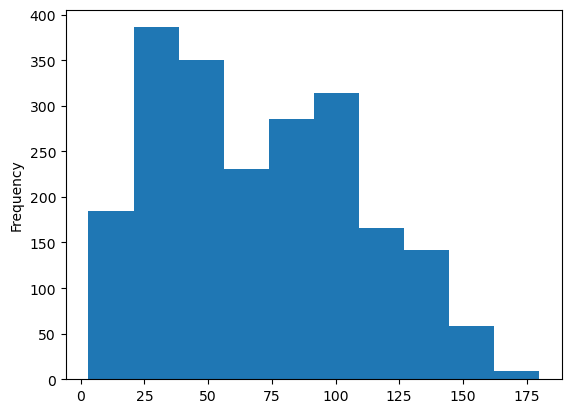

histogram_min:


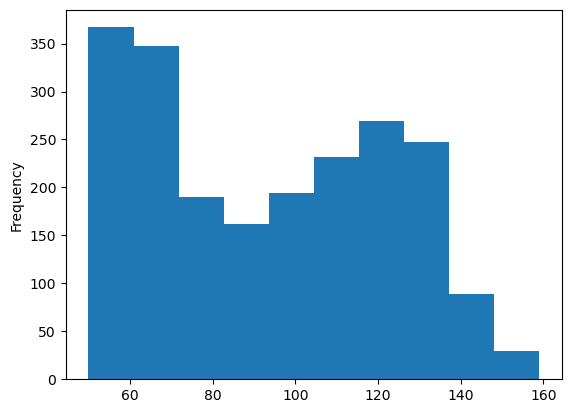

histogram_max:


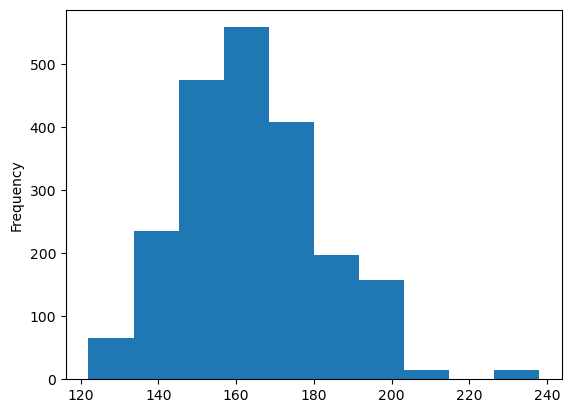

histogram_number_of_peaks:


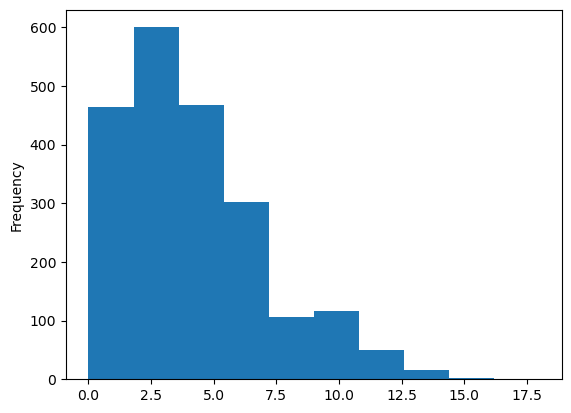

histogram_number_of_zeroes:


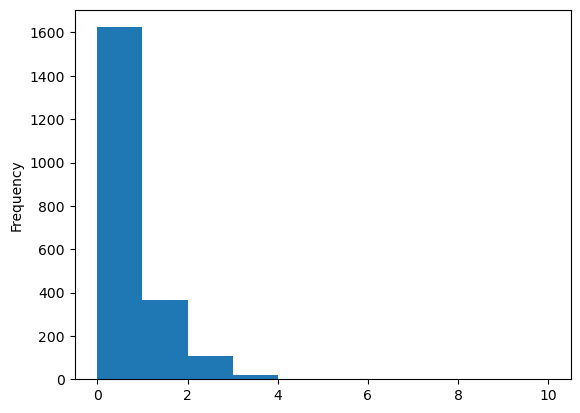

histogram_mode:


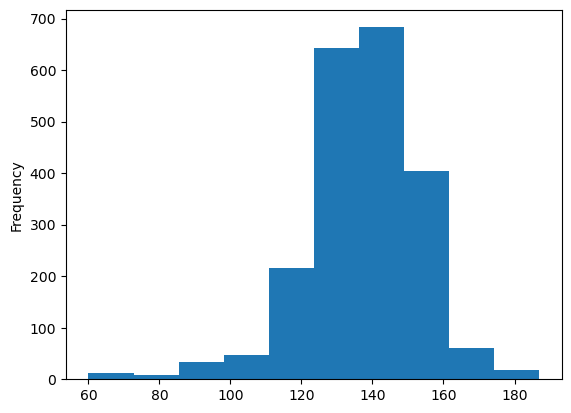

histogram_mean:


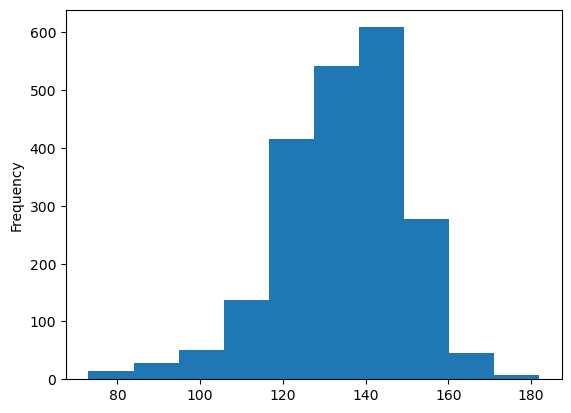

histogram_median:


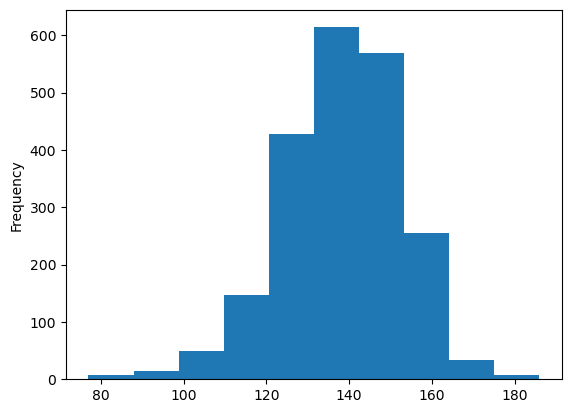

histogram_variance:


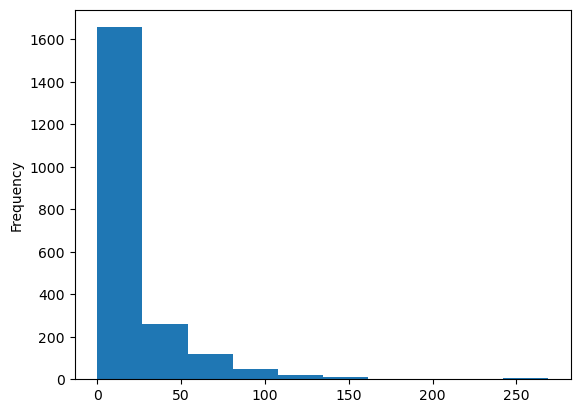

histogram_tendency:


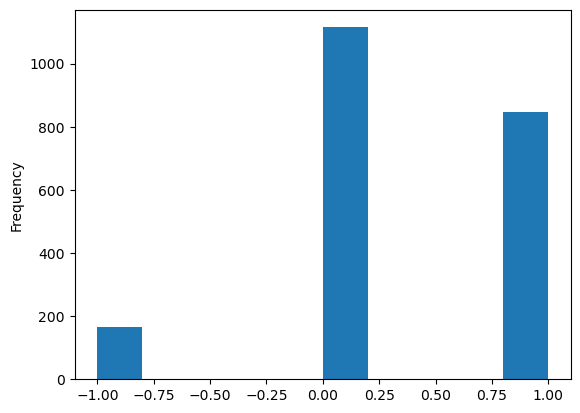

fetal_health:


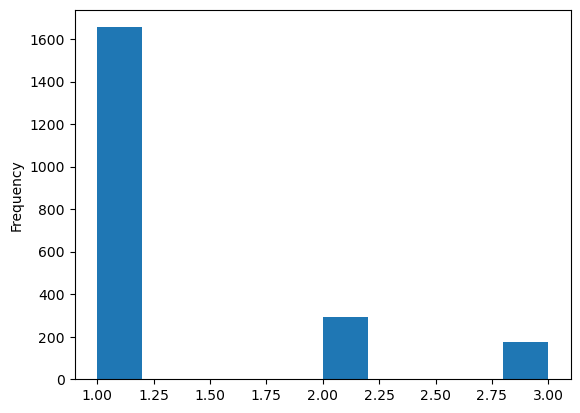

In [13]:
for col in df.columns:
    print(f"{col}:")
    df[col].plot.hist()
    plt.show()

In [14]:
df.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


(22.5, -0.5)

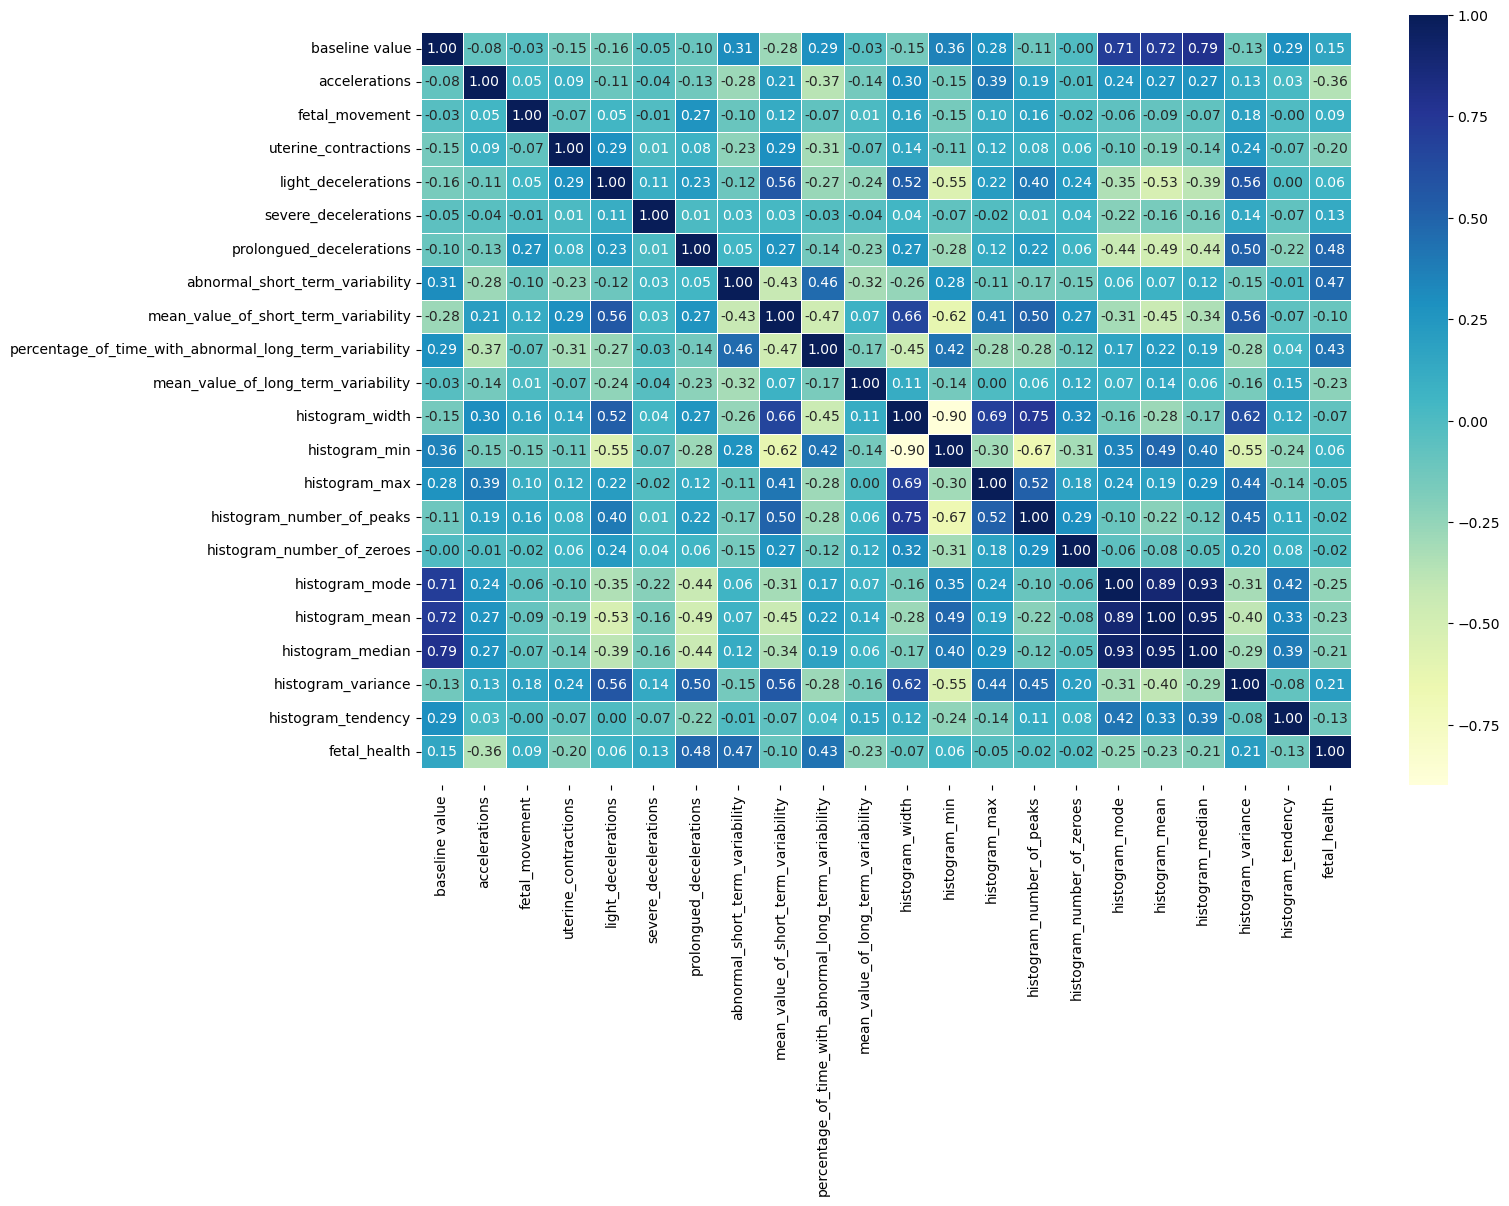

In [15]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modeling

In [16]:
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

In [17]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [18]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

In [19]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [20]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbours Classifier': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [21]:
def fit_and_score(model, X_train, y_train, X_test, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [22]:
model_scores = fit_and_score(models, X_train, y_train, X_test, y_test)

C:\Users\amirH\anaconda3\envs\ZTM\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Comparison

<Axes: >

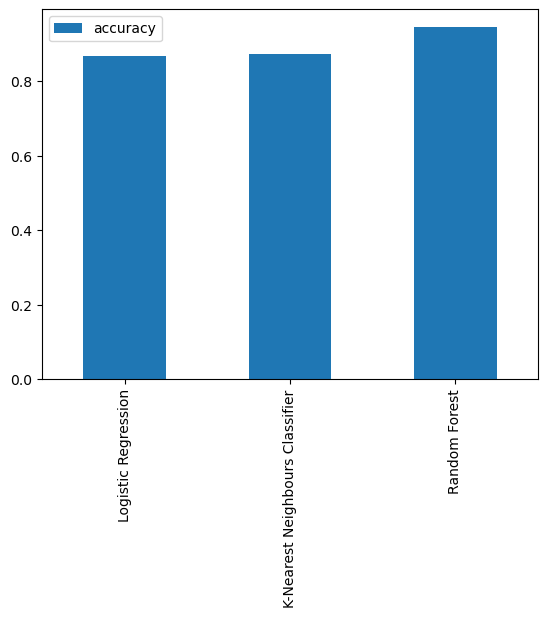

In [23]:
model_comparison = pd.DataFrame(model_scores, index=['accuracy'])
model_comparison.T.plot.bar()

### Hyperparameter tuning

In [24]:
grid_rf = 
{
    "n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
}

grid_rf2 = 
{
    "n_estimators": np.arange(510, 750, 1000),
           "max_depth": [None],
           "min_samples_split": [14, 20],
           "min_samples_leaf": [1]
}


In [25]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=grid_rf,
                          cv=5,
                           n_iter=20,
                           verbose=True,)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [26]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [27]:
rs_rf.score(X_test, y_test)

0.9389671361502347

In [28]:
np.random.seed(42)
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=grid_rf2,
                          cv=5,
                          verbose=True,
                          n_jobs=True)
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=True,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [14, 20],
                         'n_estimators': array([510])},
             verbose=True)

In [29]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'n_estimators': 510}

In [30]:
gs_rf.score(X_test, y_test)

0.9295774647887324

## Evaluting our tuned machine learning classifier, beyond accuracy
* Confusion matrix
* Classification report


In [35]:
model = RandomForestClassifier(
 max_depth=None,
 min_samples_leaf=1,
 min_samples_split=14,
 n_estimators=510
)

model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=14, n_estimators=510)

In [36]:
model.score(X_test, y_test)

0.9366197183098591

In [38]:
y_preds = model.predict(X_test)

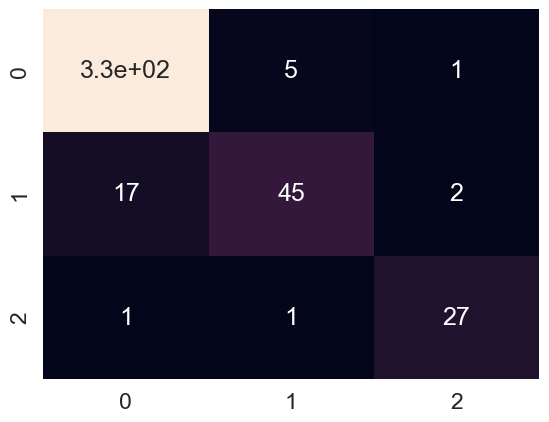

In [40]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    
plot_conf_mat(y_test, y_preds)

In [41]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       333
         2.0       0.88      0.70      0.78        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.94       426
   macro avg       0.91      0.87      0.89       426
weighted avg       0.93      0.94      0.93       426

